In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from time import time

DATA_PATH = "../data/cifar-10-batches-py/"

def unpack(fname):
    import pickle
    with open(fname, "rb") as fin:
        dumped = pickle.load(fin, encoding="bytes")
    return dumped

train_input = []
train_output = []
for i in range(5):
    raw_train_data = unpack(DATA_PATH + "data_batch_" + str(i+1))
    train_input.append(np.array(raw_train_data[b"data"], dtype=float) / 255)
    train_output.append(np.array([[1 if x == label else 0 for x in range(10)] for label in raw_train_data[b"labels"]]))
train_input = np.concatenate(train_input)
train_output = np.concatenate(train_output)

raw_test_data = unpack(DATA_PATH + "test_batch")
test_input = np.array(raw_test_data[b"data"], dtype=float) / 255
test_output = np.array(raw_test_data[b"labels"])

In [2]:
print(train_input.shape)
print(train_output.shape)

(50000, 3072)
(50000, 10)


In [3]:
import keras.models as km
import keras.layers as kl
import keras.optimizers as ko

Using TensorFlow backend.


In [4]:
def nn(hidden_layer_size=100, activation="relu", dropout=0.2, epochs=1):
    model = km.Sequential()
    model.add(kl.Dense(hidden_layer_size, activation=activation, input_shape=(3072,)))
    model.add(kl.Dropout(dropout))
    model.add(kl.Dense(10, activation='softmax'))
    
    model.summary()
    
    model.compile(loss='categorical_crossentropy', optimizer=ko.SGD(), metrics=["accuracy"])
    
    model.fit(train_input, train_output, epochs=epochs)
        
    predict = [np.argmax(x) for x in model.predict(test_input)]
    
    correct_sum = 0
    for i in range(len(predict)):
        if predict[i] == test_output[i]:
            correct_sum += 1
    return correct_sum / 10000

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                153650    
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                510       
Total params: 154,160
Trainable params: 154,160
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1
50000/50000 [==============================] - 8s 152us/step - loss: 1.9932 - acc: 0.2750
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               307300    
_________________________________________________________________
dropout_6 (Dropout)          (None, 

50000/50000 [==============================] - 36s 719us/step - loss: 1.8894 - acc: 0.3244
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 550)               1690150   
_________________________________________________________________
dropout_15 (Dropout)         (None, 550)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                5510      
Total params: 1,695,660
Trainable params: 1,695,660
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1
50000/50000 [==============================] - 43s 863us/step - loss: 1.8825 - acc: 0.3281
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 600)               1843800   
______

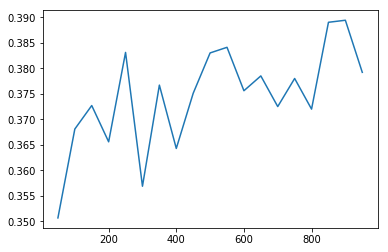

In [9]:
accuracies = []
hidden_layer_sizes = list(range(50, 1000, 50))
for hidden_layer_size in hidden_layer_sizes:
    accuracies.append(nn(hidden_layer_size=hidden_layer_size))

plt.plot(hidden_layer_sizes, accuracies)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 100)               307300    
_________________________________________________________________
dropout_24 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 10)                1010      
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1
50000/50000 [==============================] - 10s 202us/step - loss: 1.8935 - acc: 0.3204
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 100)               307300    
_________________________________________________________________
dropout_25 (Dropout)         (None,

50000/50000 [==============================] - 10s 202us/step - loss: 1.8934 - acc: 0.3221


ValueError: x and y must have same first dimension, but have shapes (19,) and (10,)

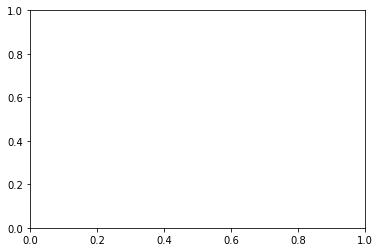

In [11]:
accuracies = []
dropouts = np.linspace(0, 1, 10)
for dropout in dropouts:
    accuracies.append(nn(dropout=dropout))

plt.plot(dropouts, accuracies)

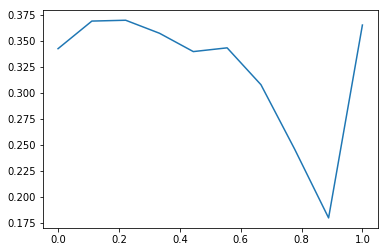

In [15]:
plt.plot(dropouts, accuracies)

In [16]:
nn(hidden_layer_size=500, dropout=0.2, epochs=50)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 500)               1536500   
_________________________________________________________________
dropout_34 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 10)                5010      
Total params: 1,541,510
Trainable params: 1,541,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50000/50000 [==============================] - 33s 659us/step - loss: 1.8826 - acc: 0.3295
Epoch 2/50
50000/50000 [==============================] - 31s 627us/step - loss: 1.7131 - acc: 0.3968
Epoch 3/50
50000/50000 [==============================] - 31s 628us/step - loss: 1.6439 - acc: 0.4196
Epoch 4/50
50000/50000 [==============================] - 31s 629us/step - loss: 1.5983 - 

0.5228